<a href="https://colab.research.google.com/github/jrandrade07/Mackenzie_Tarefas/blob/main/Trilha_4_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas_ods_reader

# IMPORTANDO BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_ods_reader import read_ods
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances

# CARREGANDO DATASET

In [ ]:
df = read_ods('APR NÃO SUP_Tarefa_Trilha 4.ods')
df

,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,NOME_MUN,LEG,DATA
0,Centro-Oeste,53.0,DF,5301.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101,NÃO TEM,5300108.0,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
1,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200100.0,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
2,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200175.0,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
3,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200258.0,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
4,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200308.0,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4202404.0,BLUMENAU,Lei Complementar 162,1998-01-06T00:00:00
1416,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4205902.0,GASPAR,Lei Complementar 162,1998-01-06T00:00:00
1417,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4207502.0,INDAIAL,Lei Complementar 162,1998-01-06T00:00:00
1418,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4213203.0,POMERODE,Lei Complementar 162,1998-01-06T00:00:00


# EXCLUINDO COLUNAS E DISCRETIZANDO OS DADOS CATEGORICOS
#### O dataset possui dados categóricos e números, havendo relação entre:  COD_UF com SIGLA_UF, COD com NOME, COD_CAT_ASSOC com CAT_ASSOC e COD_MUN com NOME_MUN, conforme pode ser observado no dicionário do dataset.
### Embora existam dados números relacionados a uma categoria, conforme demostrado acima, serão excluídos essas colunas, mantendo-se os dados categóricos que serão discretizados, considerando que foi observado em teste anterior a existência de uma string na coluna COD_CAT_ASSOC, bem como será excluido o campo de data, uma vez que não será utlizada serie temporal.


In [ ]:
df = df.drop(['COD_UF','COD','COD_CAT_ASSOC','COD_MUN','DATA'], axis=1)
df

,GRANDE_REG,SIGLA_UF,NOME,TIPO,CAT_ASSOC,NOME_MUN,LEG
0,Centro-Oeste,DF,Região Integrada de Desenvolvimento do Distrit...,RIDE,NÃO TEM,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
1,Centro-Oeste,GO,Região Integrada de Desenvolvimento do Distrit...,RIDE,NÃO TEM,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
2,Centro-Oeste,GO,Região Integrada de Desenvolvimento do Distrit...,RIDE,NÃO TEM,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
3,Centro-Oeste,GO,Região Integrada de Desenvolvimento do Distrit...,RIDE,NÃO TEM,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
4,Centro-Oeste,GO,Região Integrada de Desenvolvimento do Distrit...,RIDE,NÃO TEM,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
...,...,...,...,...,...,...,...
1415,Sul,SC,Região Metropolitana do Vale do Itajaí,RM,Núcleo Metropolitano,BLUMENAU,Lei Complementar 162
1416,Sul,SC,Região Metropolitana do Vale do Itajaí,RM,Núcleo Metropolitano,GASPAR,Lei Complementar 162
1417,Sul,SC,Região Metropolitana do Vale do Itajaí,RM,Núcleo Metropolitano,INDAIAL,Lei Complementar 162
1418,Sul,SC,Região Metropolitana do Vale do Itajaí,RM,Núcleo Metropolitano,POMERODE,Lei Complementar 162


# VERIFICANDO DUPLICIDADE
Nesse cenário não foram localizadas duplicidades

In [ ]:
df[df.duplicated(keep=False)]

,GRANDE_REG,SIGLA_UF,NOME,TIPO,CAT_ASSOC,NOME_MUN,LEG


#NORMALIZANDO OS DADOS

In [ ]:
df = df.apply(lambda x: pd.factorize(x)[0])
df_st = StandardScaler().fit_transform(df)
pd.DataFrame(df_st, columns=df.columns).head(2)

,GRANDE_REG,SIGLA_UF,NOME,TIPO,CAT_ASSOC,NOME_MUN,LEG
0,-1.957083,-2.030677,-1.973913,-3.349843,-0.579811,-1.703626,-1.772688
1,-1.957083,-1.906460,-1.973913,-3.349843,-0.579811,-1.701125,-1.772688


As cores do mapa de calor na matriz de correlação acima representam uma forte relação linear positiva (verde), uma relação linear positiva moderada (amarela) e uma relação linear negativa (vermelho) entre as características. Tal mapa de calor da matriz de correlação fornece uma maneira visual simples de detectar grupos collineares de características.

# FAZENDO A REDUÇÃO DE DIMENSIONALIDADE LINEAR COM PCA



In [ ]:
def pca(X, n_components=2):
  
     # Presprocessing - Standard Scaler
    X_std = StandardScaler().fit_transform(X)
 
     #Calculate covariance matrix
    cov_mat = np.cov(X_std.T)
    
    # Get eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat) 
    
    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    matrix_w = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])
    
    # Get the PCA reduced data
    Xpca = X_std.dot(matrix_w)
 
    return Xpca

In [ ]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(df_st)
Xpca

array([[ 4.68395139, -2.51449523],
       [ 4.62885672, -2.51050539],
       [ 4.62778856, -2.51067685],
       ...,
       [-3.22927339, -1.54033276],
       [-3.23034156, -1.54050422],
       [-3.23140972, -1.54067568]])

# FAZENDO A REDUÇÃO DE DIMENSIONALIDADE NÃO LINEAR COM Kenel PCA

In [ ]:
def ker_pca(X, n_components=3, gamma = 0.01):
    
    # Calculate euclidean distances of each pair of points in the data set
    dist = euclidean_distances(X, X, squared=True)
    
    # Calculate Gaussian kernel matrix
    K = np.exp(-gamma * dist)
    Kc = KernelCenterer().fit_transform(K)
    
    # Get eigenvalues and eigenvectors of the kernel matrix
    eig_vals, eig_vecs = np.linalg.eigh(Kc)
    
    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    Xkpca = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])
 
    return Xkpca

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
Xkpca = kpca.fit_transform(df_st)
Xkpca

array([[ 0.51985384, -0.27966915],
       [ 0.51553747, -0.27853806],
       [ 0.51545407, -0.27854031],
       ...,
       [-0.38671286, -0.26184375],
       [-0.3868049 , -0.26186903],
       [-0.38689687, -0.26189429]])

# PLOTANDO GRÁFICO PARA COMPARAÇÃO

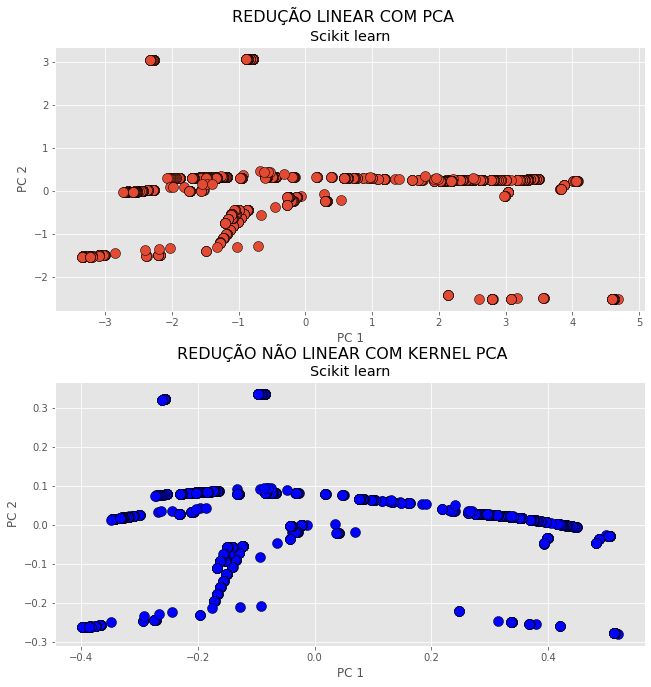

In [ ]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    fig.suptitle('REDUÇÃO LINEAR COM PCA', fontsize=16)
    plt.figtext(0.5, 0.5, 'REDUÇÃO NÃO LINEAR COM KERNEL PCA', ha='center', va='center', fontsize=16)
    fig.tight_layout(pad=5.0)
 
    #plt.figure(figsize=(8,6))
    ax[0].scatter(Xpca[:,0], Xpca[:,1], s=100, edgecolors='k')   
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn')
    
    ax[1].scatter(Xkpca[:,0], Xkpca[:,1], s=100, facecolor = 'b', edgecolors='k')   
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Scikit learn')
        
    plt.show()

# CONCLUSÃO
É possível observar que a redução com o PCA e o Kernel PCA tiveram um resulta similiar.